<a href="https://colab.research.google.com/github/Arimoro2020/food-sales-predictions./blob/main/Using_Random_Forest_Trees_to_create_a_model_to_predict_sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import clone

Load Cleaned Data & Check first five Rows

In [3]:
df_sales = pd.read_excel('/content/drive/MyDrive/PTDataScience/Introduction_to_ML/cleansed data_sales pridiction.xlsx')
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


Check Data Types

In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


Drop Item Identifier Column because it has mostly unique values

In [5]:
df_sales.drop(columns='Item_Identifier', inplace=True)
df_sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


Convert Outlet Establishment Year to Object type

In [6]:
df_sales['Outlet_Establishment_Year'] = df_sales['Outlet_Establishment_Year'].astype(str)
df_sales['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: object

**Transform Categorical Columns into Dummy Variables**

1. Item Fat Content

In [7]:
item_fat_content = pd.get_dummies(df_sales['Item_Fat_Content'], drop_first=True)
df_sales = pd.concat([df_sales, item_fat_content], axis=1)
df_sales.drop(columns='Item_Fat_Content', inplace=True)
df_sales.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Regular
0,9.30,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,0
1,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,1
2,17.50,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,0
3,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,1
4,8.93,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,0


2. Item Type

In [8]:
item_type = pd.get_dummies(df_sales['Item_Type'], drop_first=True)
df_sales = pd.concat([df_sales, item_type], axis=1)
df_sales.drop(columns='Item_Type', inplace=True)
df_sales.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0.016047,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


3. Outlet Identifier

In [9]:
outlet_identifier = pd.get_dummies(df_sales['Outlet_Identifier'], drop_first=True)
df_sales = pd.concat([df_sales, outlet_identifier], axis=1)
df_sales.drop(columns='Outlet_Identifier', inplace=True)
df_sales.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,9.30,0.016047,249.8092,1999,Tier 1,Supermarket Type1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,2009,Tier 3,Supermarket Type2,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1999,Tier 1,Supermarket Type1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,1998,Tier 3,Grocery Store,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,Tier 3,Supermarket Type1,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


4. Outlet Establishment Year

In [10]:
outlet_est_year = pd.get_dummies(df_sales['Outlet_Establishment_Year'], drop_first=True)
df_sales = pd.concat([df_sales, outlet_est_year], axis=1)
df_sales.drop(columns='Outlet_Establishment_Year', inplace=True)
df_sales.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,1987,1997,1998,1999,2002,2004,2007,2009
0,9.30,0.016047,249.8092,Tier 1,Supermarket Type1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,5.92,0.019278,48.2692,Tier 3,Supermarket Type2,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,17.50,0.016760,141.6180,Tier 1,Supermarket Type1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,19.20,0.000000,182.0950,Tier 3,Grocery Store,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,8.93,0.000000,53.8614,Tier 3,Supermarket Type1,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


5. Outlet Location Type

In [11]:
loc_type = pd.get_dummies(df_sales['Outlet_Location_Type'], drop_first=True)
df_sales = pd.concat([df_sales, loc_type], axis=1)
df_sales.drop(columns='Outlet_Location_Type', inplace=True)
df_sales.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Type,Item_Outlet_Sales,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,1987,1997,1998,1999,2002,2004,2007,2009,Tier 2,Tier 3
0,9.30,0.016047,249.8092,Supermarket Type1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,5.92,0.019278,48.2692,Supermarket Type2,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,17.50,0.016760,141.6180,Supermarket Type1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,19.20,0.000000,182.0950,Grocery Store,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,8.93,0.000000,53.8614,Supermarket Type1,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


6. Outlet Type

In [12]:
outlet_type = pd.get_dummies(df_sales['Outlet_Type'], drop_first=True)
df_sales = pd.concat([df_sales, outlet_type], axis=1)
df_sales.drop(columns='Outlet_Type', inplace=True)
df_sales.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,1987,1997,1998,1999,2002,2004,2007,2009,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [13]:

y = df_sales['Item_Outlet_Sales']
X = df_sales.loc[ : ,['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Regular', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods',
       'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene',
       'Household', 'Meat', 'Others', 'Seafood', 'Snack Foods', 'Soft Drinks',
       'Starchy Foods', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049', '1987', '1997', '1998', '1999',
       '2002', '2004', '2007', '2009', 'Tier 2', 'Tier 3', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3']]



Import Train Test Split from Sklearn

In [14]:
from sklearn.model_selection import train_test_split

Split Data into Training & Testing Data

In [15]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [16]:
save = X_train.copy()
save

,Item_Weight,Item_Visibility,Item_MRP,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,1987,1997,1998,1999,2002,2004,2007,2009,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
4122,5.945000,0.093171,127.3652,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
6590,10.356667,0.141138,155.0998,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
5460,19.000000,0.048980,148.7050,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4541,13.400000,0.075702,124.6388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4186,14.520000,0.035248,84.7224,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,20.387500,0.056696,104.0648,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
79,8.524000,0.000000,222.5456,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
8039,17.392857,0.081485,258.0988,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
6936,19.000000,0.010315,208.4954,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


Import StandardScaler for Normalization

In [17]:
from sklearn.preprocessing import StandardScaler

Create Instance of Standardscaler, Fit & Transform on X

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Import RandomForestRegressor from sklearn

In [19]:
from sklearn.ensemble import RandomForestRegressor

Create & Train Model

In [20]:
rfr = RandomForestRegressor(n_estimators=102, max_depth =5)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=102, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Test Model

In [21]:
pred = rfr.predict(X_test)

Import Metrics for Evaluating Model

In [22]:
from sklearn import metrics
metrics.mean_squared_error(y_test, pred)

1145906.7734131203

In [23]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
RMSE

1070.4703514871958

In [24]:
metrics.mean_absolute_error(rfr.predict(X_train), y_train)

741.7000337911494

In [25]:
MAE = metrics.mean_absolute_error(y_test, pred)
MAE

752.4705047537785

Check for Feature Importance: Permutation Importance

In [26]:



rfr2 = clone(rfr)
rfr2.fit(X_train, y_train)


baseline = metrics.mean_squared_error(rfr.predict(X_train), y_train)
imp = []

for col in save.columns:
    save2 = save[col].copy()
    save[col] = np.random.permutation(save[col])
    m = metrics.mean_squared_error(rfr.predict(save), y_train)
    save[col] = save2
    imp.append(m - baseline)
imp = np.array(imp)
                          
imp_df = pd.DataFrame(data={'Feature':save.columns, 'Importance':imp})
    
imp_df = imp_df.sort_values('Importance', ascending=False)

imp_df.head(100)

,Feature,Importance
1,Item_Visibility,5.912095e+06
30,1998,5.912017e+06
22,OUT019,5.912017e+06
23,OUT027,5.912017e+06
24,OUT035,5.912017e+06
25,OUT045,5.912017e+06
26,OUT046,5.912017e+06
27,OUT049,5.912017e+06
28,1987,5.912017e+06
29,1997,5.912017e+06


Get RMSE for optimizing K values (1 - 40) & max_depth

In [27]:
error_rate = []

for i in range(1, 40):
    rfr3 = RandomForestRegressor(n_estimators=102, max_depth=i )
    rfr3.fit(X_train, y_train)
    pred_i = rfr3.predict(X_test)
    error_rate.append(np.sqrt(metrics.mean_squared_error(y_test, pred_i)))

Text(0, 0.5, 'Error Rate')

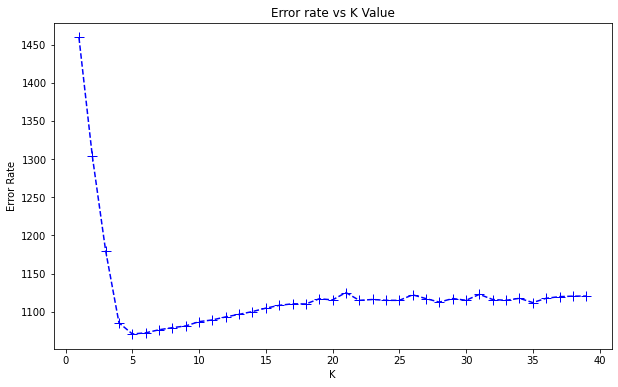

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='+', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')